In [3]:
# %% [code]
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in the notebook
%matplotlib inline

# Load the data (update the path to your CSV file)
df = pd.read_csv("/Users/mohitrudrarajusuresh/ABSA-Sentiment-Project-1/ABSA-Sentiment-Project/data/processed/yelp_hf_sentiment.csv")
df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,hf_label,hf_stars,hf_score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"if you decide to eat here, just be aware it is...",2018-07-07 22:09:11,3 stars,3,0.512387
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,i've taken a lot of spin classes over the year...,2012-01-03 15:28:18,5 stars,5,0.325734
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,family diner. had the buffet. eclectic assortm...,2014-02-05 20:30:30,5 stars,5,0.509331
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"wow! yummy, different, delicious. our favo...",2015-01-04 00:01:03,5 stars,5,0.918620
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,3 stars,3,0.443903


In [4]:
# %% [code]
# Get an overview of the dataset
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Convert the 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370000 entries, 0 to 1369999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   review_id    1370000 non-null  object 
 1   user_id      1370000 non-null  object 
 2   business_id  1370000 non-null  object 
 3   stars        1370000 non-null  float64
 4   useful       1370000 non-null  int64  
 5   funny        1370000 non-null  int64  
 6   cool         1370000 non-null  int64  
 7   text         1369995 non-null  object 
 8   date         1370000 non-null  object 
 9   hf_label     1370000 non-null  object 
 10  hf_stars     1370000 non-null  int64  
 11  hf_score     1370000 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 125.4+ MB
Missing values per column:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           5
date           0
hf_label       0
hf_stars  

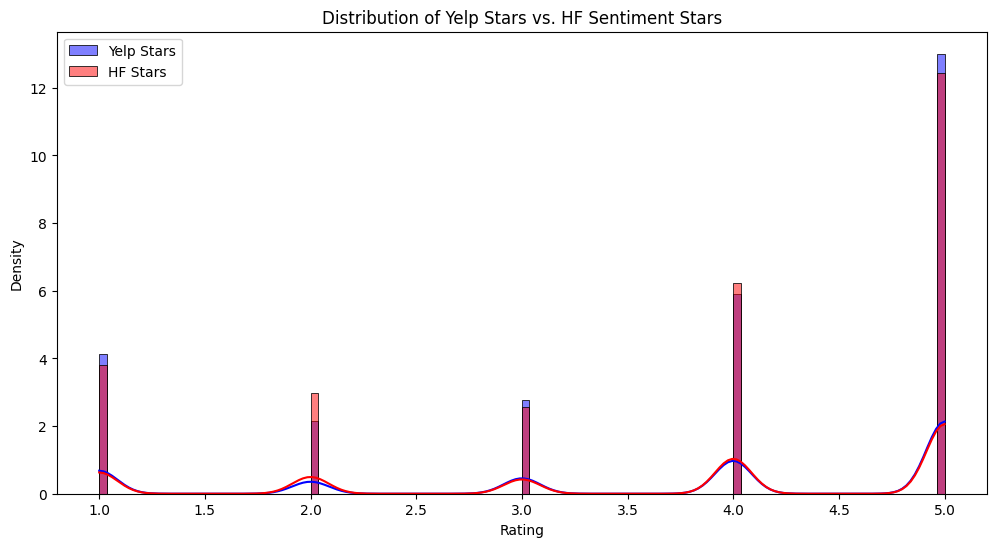

In [5]:
# %% [code]
# Plot the distribution of Yelp star ratings and hf_stars (sentiment ratings)
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], color='blue', kde=True, stat='density', label="Yelp Stars", alpha=0.5)
sns.histplot(df['hf_stars'], color='red', kde=True, stat='density', label="HF Stars", alpha=0.5)
plt.legend()
plt.xlabel("Rating")
plt.title("Distribution of Yelp Stars vs. HF Sentiment Stars")
plt.show()


In [6]:
# %% [code]
# Compute the correlation between the two rating columns
correlation = df[['stars', 'hf_stars']].corr()
print("Correlation between Yelp Stars and HF Stars:")
print(correlation)


Correlation between Yelp Stars and HF Stars:
             stars  hf_stars
stars     1.000000  0.850533
hf_stars  0.850533  1.000000


In [7]:
# %% [code]
# Create a new column for the absolute difference between ratings
df['rating_diff'] = abs(df['stars'] - df['hf_stars'])

# Sort reviews by the difference to identify large discrepancies
df_sorted = df.sort_values(by='rating_diff', ascending=False)
df_sorted[['review_id', 'stars', 'hf_stars', 'rating_diff', 'text']].head(5)


,review_id,stars,hf_stars,rating_diff,text
755683,GJj7cvu9f8hy3QCh5pBwxA,5.0,1,4.0,hector ramirez noticed our pre paid box wasn't...
1158265,K7L34-5rMfs40NMGzdl9Aw,1.0,5,4.0,1st let me explain how you're in the hood woul...
352163,EuNgusCS9IuzY6MqyTJJkQ,5.0,1,4.0,we tried leslie's after fighting our pool for ...
187047,Sur85nh2_2BAUNVClEd-fw,5.0,1,4.0,attention: i hope my 5 star rating draws atten...
891070,9QqTfGG5Ff-V9-Fljz1m1g,5.0,1,4.0,holy crap this place is great! the noodles ar...


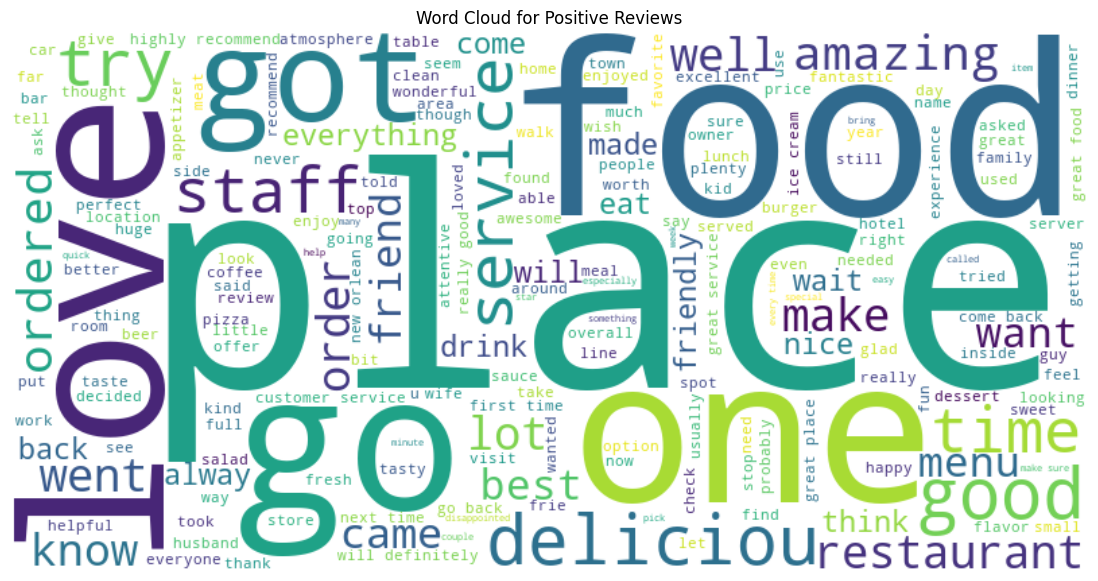

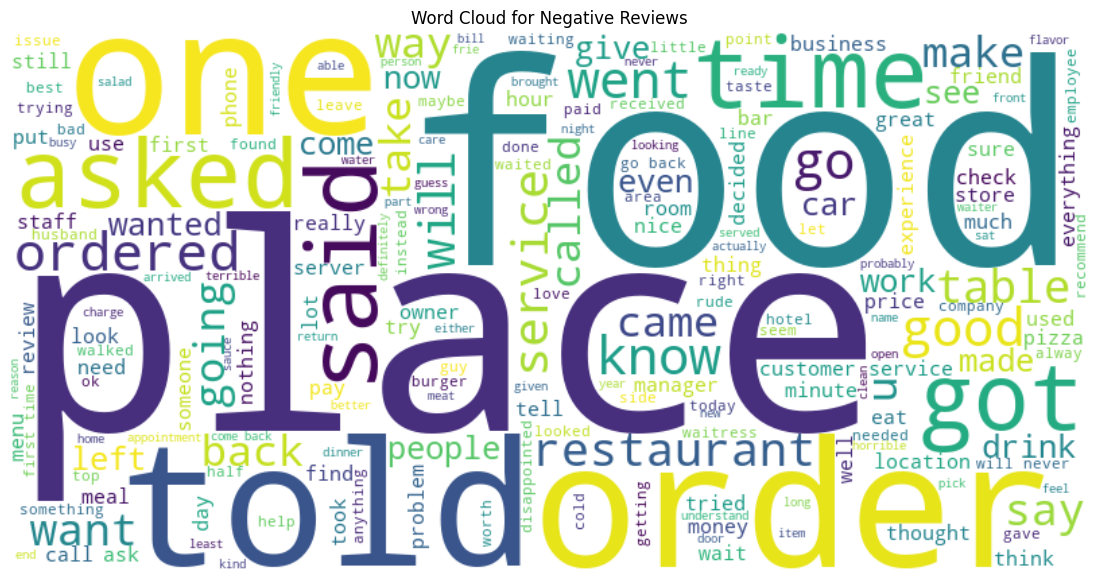

In [8]:
# %% [code]
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Define stopwords to ignore
stopwords = set(STOPWORDS)

# Prepare text for positive and negative reviews based on hf_stars (adjust threshold as needed)
positive_text = " ".join(df[df['hf_stars'] >= 4]['text'].dropna())
negative_text = " ".join(df[df['hf_stars'] <= 2]['text'].dropna())

# Create and plot a word cloud for positive reviews
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(positive_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Create and plot a word cloud for negative reviews
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(negative_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


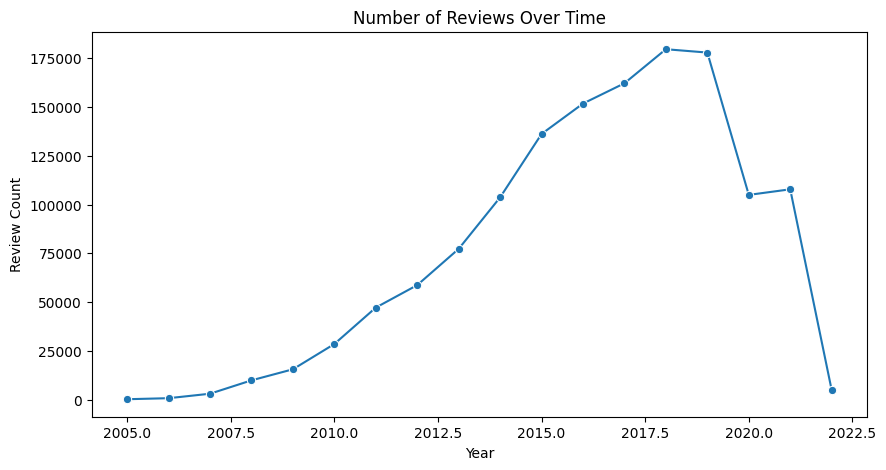

In [9]:
# %% [code]
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Plot the number of reviews per year
reviews_per_year = df.groupby('year').size().reset_index(name='review_count')
plt.figure(figsize=(10, 5))
sns.lineplot(data=reviews_per_year, x='year', y='review_count', marker="o")
plt.title("Number of Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.show()


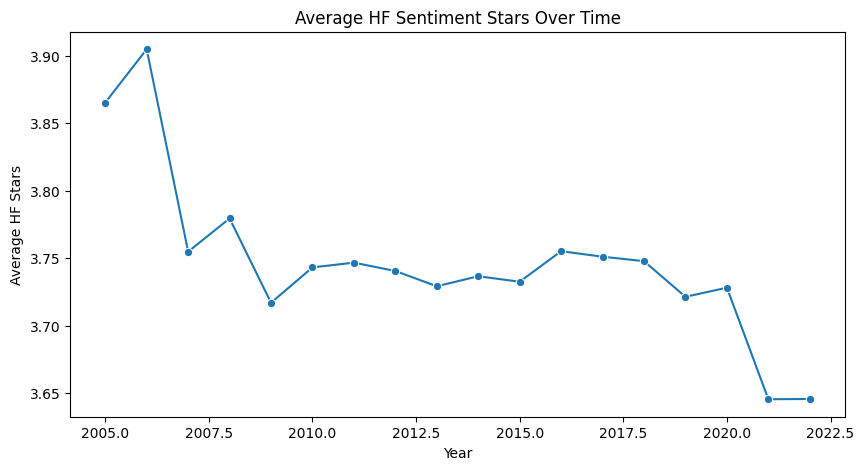

In [10]:
# %% [code]
# Plot the average hf_stars per year to see if sentiment has shifted over time
avg_sentiment_per_year = df.groupby('year')['hf_stars'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_sentiment_per_year, x='year', y='hf_stars', marker="o")
plt.title("Average HF Sentiment Stars Over Time")
plt.xlabel("Year")
plt.ylabel("Average HF Stars")
plt.show()


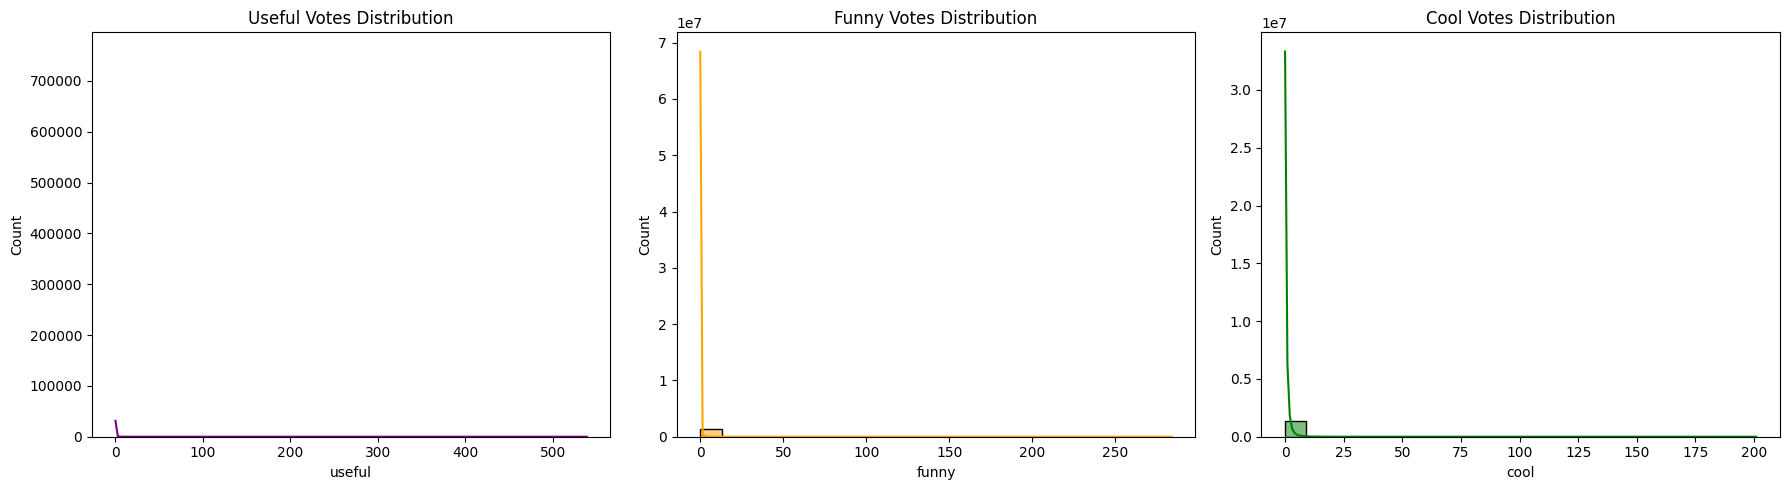

In [11]:
# %% [code]
# Plot histograms for engagement metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['useful'], kde=True, ax=axes[0], color='purple')
axes[0].set_title("Useful Votes Distribution")
sns.histplot(df['funny'], kde=True, ax=axes[1], color='orange')
axes[1].set_title("Funny Votes Distribution")
sns.histplot(df['cool'], kde=True, ax=axes[2], color='green')
axes[2].set_title("Cool Votes Distribution")
plt.tight_layout()
plt.show()


In [12]:
# %% [code]
# Group reviews by business_id and calculate average ratings and review counts
business_summary = df.groupby('business_id').agg(
    avg_yelp_stars=('stars', 'mean'),
    avg_hf_stars=('hf_stars', 'mean'),
    review_count=('review_id', 'count')
).reset_index()

business_summary.head()


,business_id,avg_yelp_stars,avg_hf_stars,review_count
0,---kPU91CF4Lq2-WlRu9Lw,4.312500,4.312500,16
1,--ZVrH2X2QXBFdCilbirsw,4.722222,4.444444,36
2,--_9CAxgfXZmoFdNIRrhHA,3.250000,3.250000,12
3,--_lZuj_WCGnDG6n0emlRg,2.230769,2.923077,13
4,--gJkxbsiSIwsQKbiwm_Ng,4.800000,4.600000,5
